In [81]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
def plot_trajectories(df, column, discrete=True, cmap='magma', n_actions=5, n_intervals=11, n_epochs_per_interval=100, figsize=10,  max_length=300):
    breaks = [int(x) for x in np.linspace(0, len(df), n_intervals)]
    prev_end = 0
    vmin = np.min(np.min(df[column]))
    vmax = np.max(np.max(df[column]))
    for i, bound in enumerate(breaks[1:]):
        data = df[column][prev_end:prev_end+n_epochs_per_interval]
        padded = []
        for d in data:
            to_append = d + [np.nan] * (max_length - len(d))
            padded.append(d + [np.nan] * (max_length - len(d)))
        if discrete:
            cmap = cmap_discretize(cmap, n_actions)
        fig = plt.figure(figsize=(figsize,figsize/2))
        plot = plt.imshow(padded, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.colorbar()  
        fig.suptitle('epoch {}:{}'.format(prev_end, prev_end+n_epochs_per_interval), fontsize=20)   
        prev_end = bound
        
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    cmap: colormap instance, eg. cm.jet. 
         N: number of colors.     
     Example
     x = resize(arange(100), (5,100))
     djet = cmap_discretize(cm.jet, 5)
     imshow(x, cmap=djet)
     """
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in np.arange(N+1)]
        # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [83]:
def load_episode_data(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(directory+f)]
    episode_data = pd.DataFrame()
    for f in files:
        try:
            new_data = pd.read_pickle(directory+f)
        except:
            print(f)
        episode_data = episode_data.append(new_data, ignore_index=True)
    episode_data = episode_data.sort_values('episode')
    episode_data = episode_data.reset_index(drop=True)
    episode_data.episode = [int(x) for x in episode_data.episode]
#     episode_data = episode_data[['episode', 'action', 'reward', 'state', 'logprob', 'mask']]
    return episode_data

In [84]:
def unpack_env_data(df):
    keys = list(df.env_data)[0][0].keys()
    for k in keys:
        df[k] = [[x[k] for x in y] for y in df.env_data]
    return df

In [72]:
summary = pd.read_pickle('../experiments/ppo3_ppo_lightbot_cross/summary.p')

In [90]:
ed = load_episode_data('../experiments/ppo3_rlgamma_99_ppo_lightbot_cross/episodes/')

In [91]:
ed = unpack_env_data(ed)

In [92]:
ed.head()

,action,env_data,episode,logprob,mask,reward,state,coords,height,direction,light_idx,lights_on
0,"[0, 0, 1, 3, 3, 2, 4, 4, 3, 3, 2, 3, 0, 4, 2, ...","[{'coords': (2, 1), 'height': 1, 'direction': ...",0,"[-1.5379635095596313, -1.5379635095596313, -1....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 3, 3, 0, 0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ..."
1,"[2, 3, 4, 3, 1, 0, 2, 2, 1, 0, 3, 1, 1, 0, 2, ...","[{'coords': (4, 0), 'height': 1, 'direction': ...",1,"[-1.6314871311187744, -1.6149356365203857, -1....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ..."
2,"[2, 1, 1, 0, 0, 3, 3, 2, 0, 3, 3, 1, 1, 0, 4, ...","[{'coords': (1, 2), 'height': 1, 'direction': ...",2,"[-1.639648675918579, -1.6541383266448975, -1.5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(1, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3, 3, 3, 3, 3, 2, 1, 1, 1, 0, 3, 3, 3, 3, 0, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ..."
3,"[1, 1, 1, 4, 1, 3, 0, 1, 3, 3, 4, 0, 4, 2, 3, ...","[{'coords': (4, 0), 'height': 1, 'direction': ...",3,"[-1.626920461654663, -1.626920461654663, -1.62...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 1, 1, 0, 0, 0, 3, 2, 3, 3, 0, 0, 3, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ..."
4,"[4, 1, 4, 4, 4, 3, 3, 4, 2, 1, 0, 4, 1, 0, 3, ...","[{'coords': (4, 4), 'height': 1, 'direction': ...",4,"[-1.598793387413025, -1.6443612575531006, -1.5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(4, 4), (4, 4), (4, 4), (4, 4), (4, 4), (4, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[1, 1, 2, 3, 0, 3, 2, 3, 3, 3, 3, 0, 0, 0, 3, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ..."


In [37]:
idxs = [i for i,c in enumerate(ed.action) if len(c) < 100]

In [42]:
np.sum(ed.reward[1360])

43.0

In [94]:
import pickle
with open('../experiments/ppo3_rlgamma_99_ppo_lightbot_cross/config.p', 'rb') as f:
    config = pickle.load(f)

In [97]:
config.training.lr_gamma

0.9

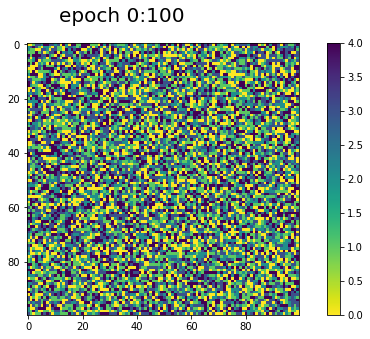

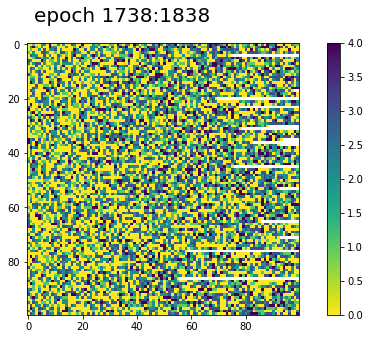

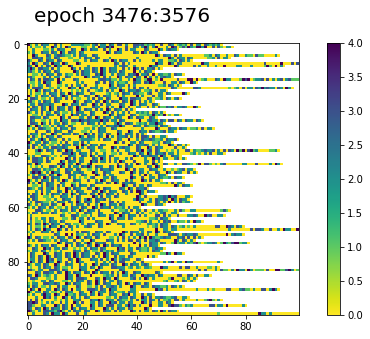

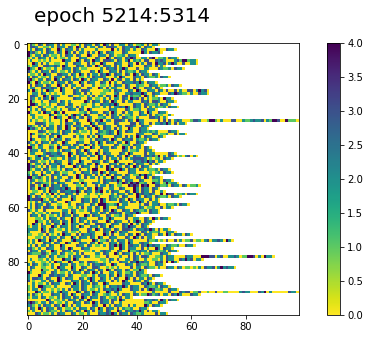

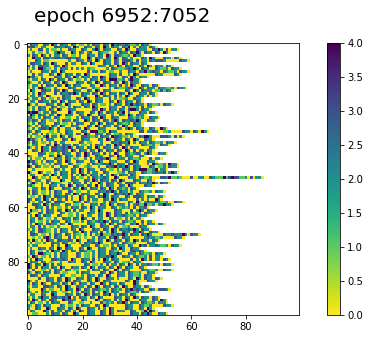

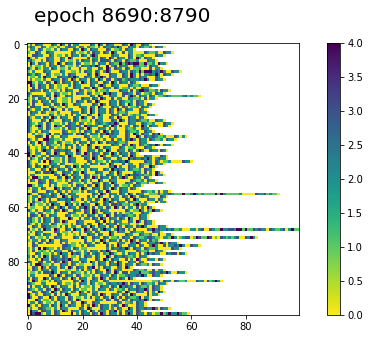

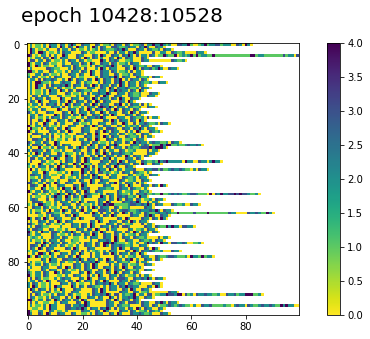

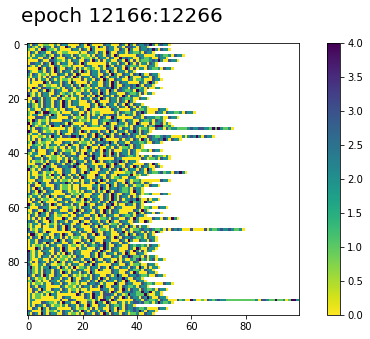

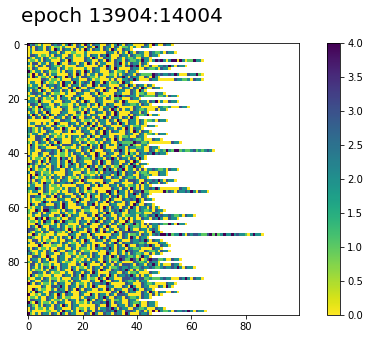

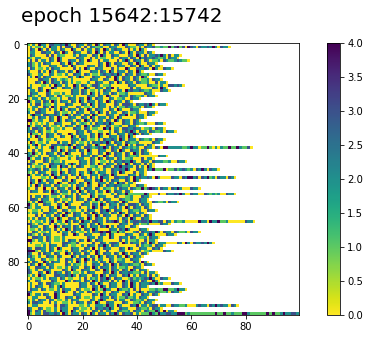

In [93]:
plot_trajectories(ed, 'action', discrete=False, cmap='viridis_r', max_length=100)

In [24]:
summary = pd.read_pickle('../experiments/ppoc_fourrooms_minibatch/summary.p')

In [25]:
summary

,episode,running_moves,running_rewards
0,1.0,55.000000,46.000000
1,2.0,55.360000,45.640000
2,3.0,56.216400,44.783600
3,4.0,58.654236,41.335764
4,5.0,61.067694,37.922406
5,6.0,63.457017,34.543182
6,7.0,63.072447,34.957750
7,8.0,65.001722,33.058173
8,9.0,67.351705,29.727591
9,10.0,68.798188,28.320315
